In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/neo_v2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [ ]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [ ]:
df = df.drop(['id','name','orbiting_body', 'sentry_object'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [ ]:
# Target variable is hazardous True/False

print('% Of Hazardous vs Non-Hazardous')
print(df['hazardous'].value_counts())
print('\n')

print('Percentage')
print(df['hazardous'].value_counts() / len(df)* 100)

% Of Hazardous vs Non-Hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


Percentage
False    90.268176
True      9.731824
Name: hazardous, dtype: float64


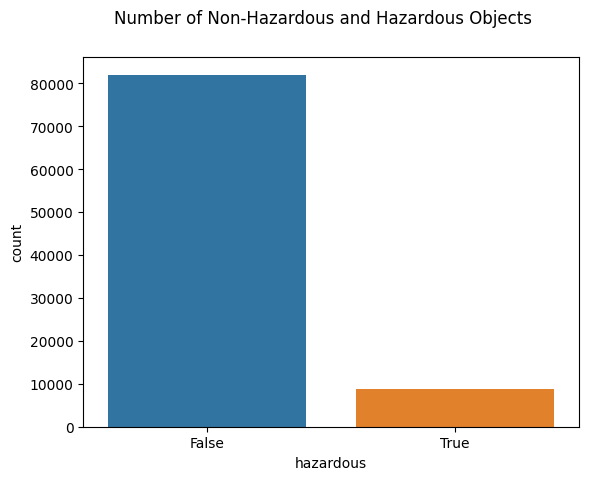

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

<Axes: >

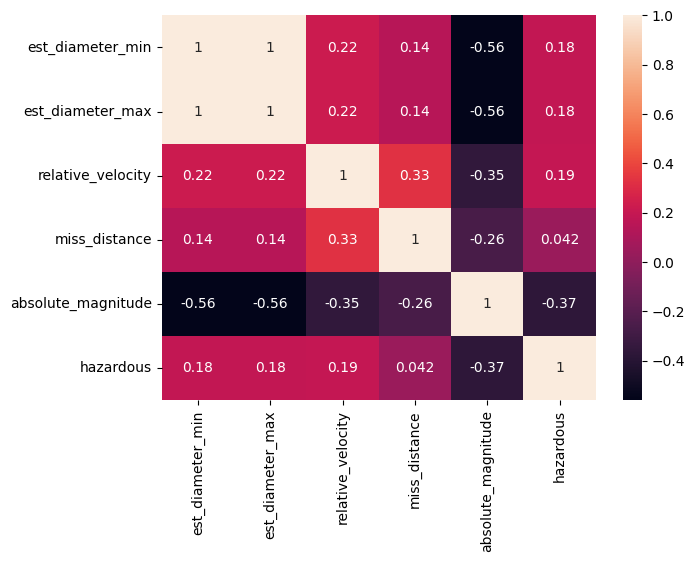

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

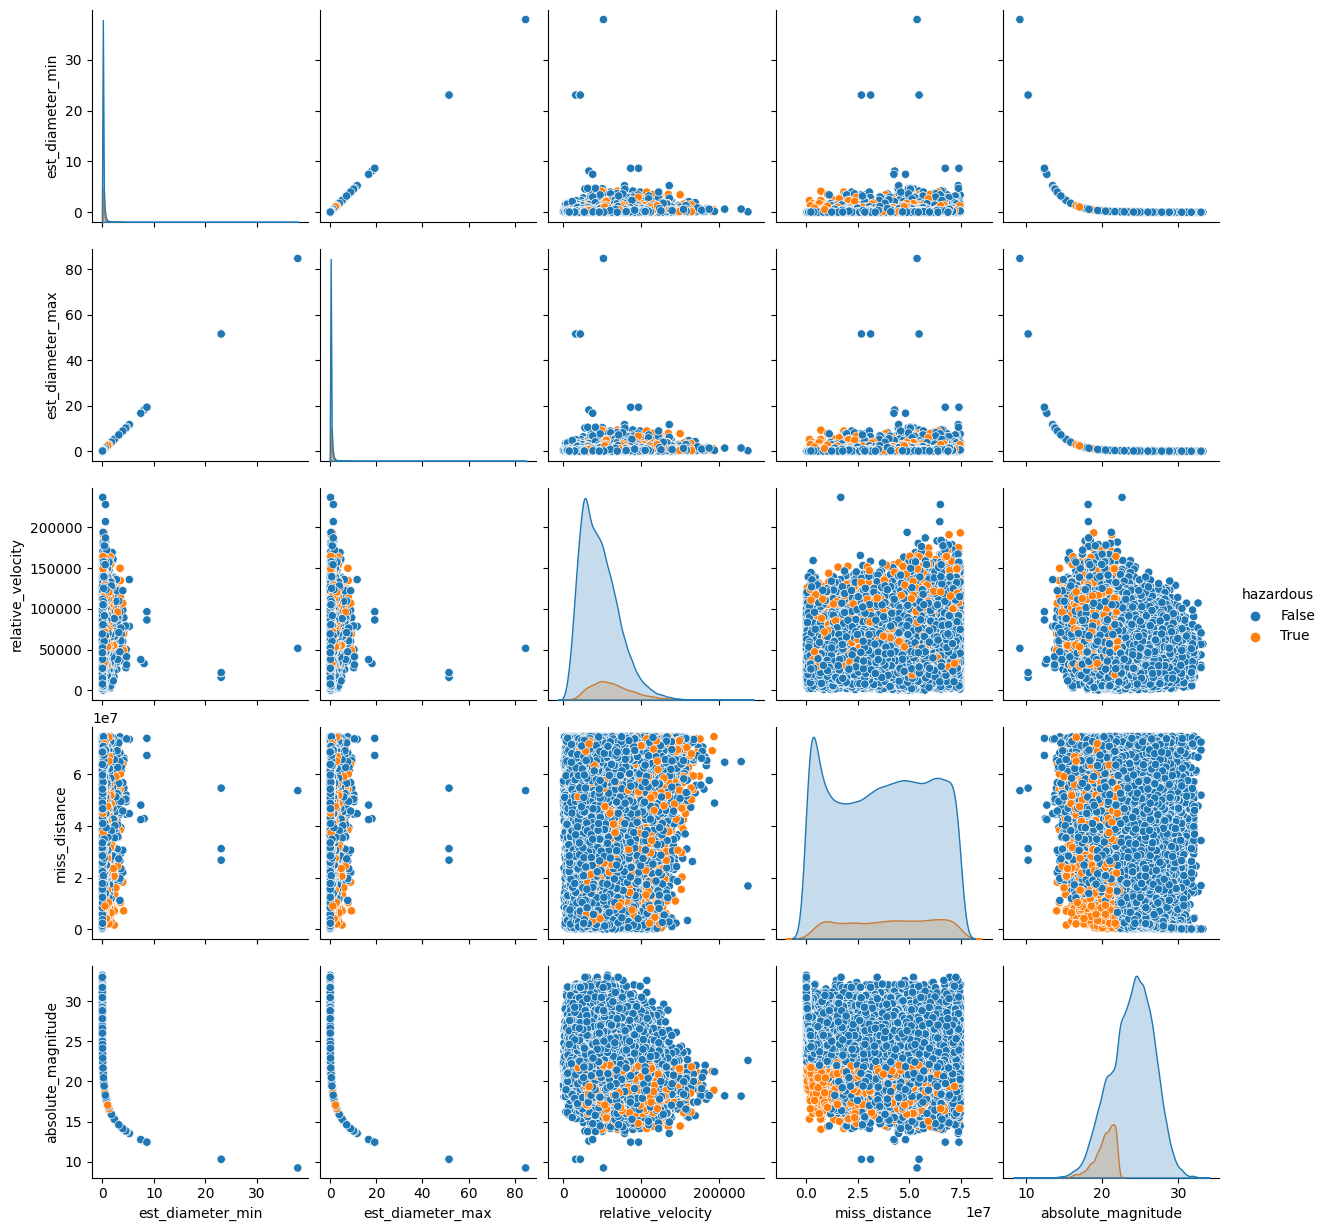

In [ ]:
sns.pairplot(df, hue = 'hazardous')

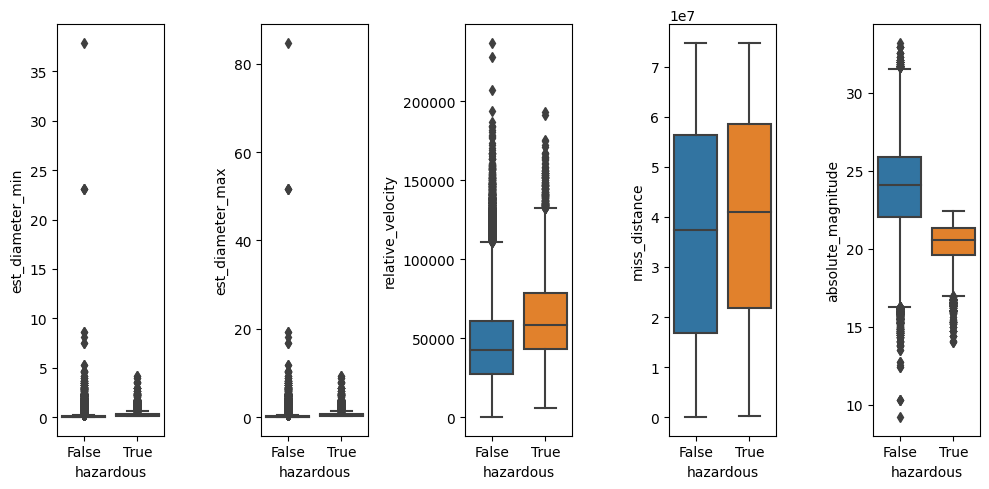

In [ ]:
nums = ['est_diameter_min','est_diameter_max', 'relative_velocity','miss_distance',
        'absolute_magnitude']
rows=1
cols=5
counter=1
plt.rcParams['figure.figsize']=[10,5]

for i in nums:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='hazardous',y=i,data=df)
    counter+=1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_hazardous = LabelEncoder()
df['hazardous'] = label_encoder_hazardous.fit_transform(df['hazardous'])
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [ ]:
X = df.drop(['hazardous'],axis=1)
y = df.drop(['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude'],axis=1)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              1.198271          2.679415       13569.249224   5.483974e+07   
1              0.265800          0.594347       73588.726663   6.143813e+07   
2              0.722030          1.614507      114258.692129   4.979872e+07   
3              0.096506          0.215794       24764.303138   2.543497e+07   
4              0.255009          0.570217       42737.733765   4.627557e+07   
...                 ...               ...                ...            ...   
90831          0.026580          0.059435       52078.886692   1.230039e+07   
90832          0.016771          0.037501       46114.605073   5.432121e+07   
90833          0.031956          0.071456        7566.807732   2.840077e+07   
90834          0.007321          0.016370       69199.154484   6.869206e+07   
90835          0.039862          0.089133       27024.455553   5.977213e+07   

       absolute_magnitude  
0                   16.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Dealing with imbalanced target variable
random_over_sampler = RandomOverSampler()
X, y = random_over_sampler.fit_resample(X, y)

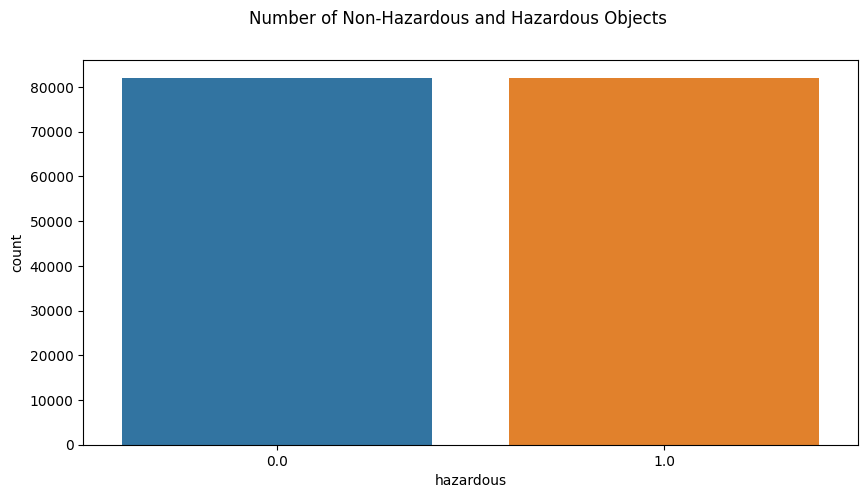

In [ ]:
df_new=pd.concat([X,y])
sns.countplot(x='hazardous',data=df_new)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[1,1]
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled=pd.DataFrame(sc.transform(X_test))

X_train_scaled.columns=X.columns
print(X_train_scaled)

        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              -0.271578         -0.271578          -0.105350      -0.889521   
1               7.681695          7.681695           1.090615      -1.024813   
2               0.325969          0.325969          -0.828081      -1.304639   
3               1.285482          1.285482           1.049531       0.358945   
4              -0.217275         -0.217275           0.227090      -1.486142   
...                  ...               ...                ...            ...   
131188         -0.024190         -0.024190          -1.080035       0.802332   
131189         -0.226855         -0.226855          -0.247565       0.550534   
131190         -0.537160         -0.537160          -1.350014       1.309696   
131191         -0.436687         -0.436687           0.912015      -0.366366   
131192          0.093218          0.093218          -0.216607      -0.454365   

        absolute_magnitude  
0         

<Axes: >

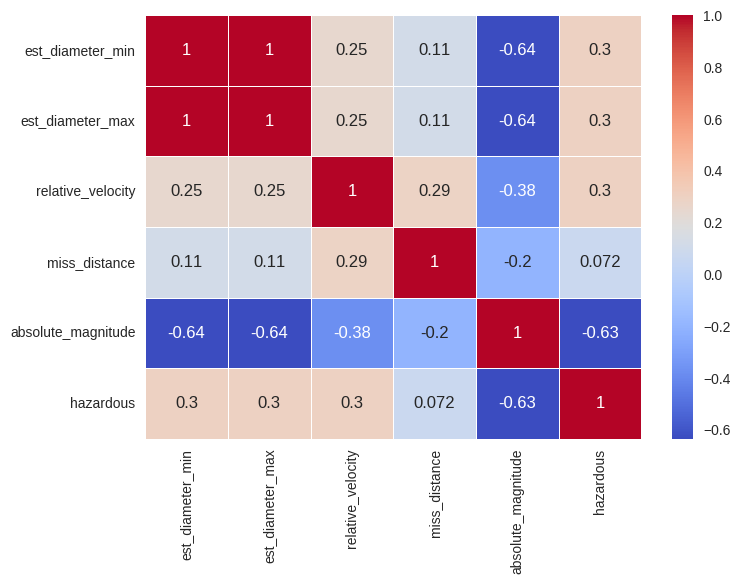

In [ ]:
X_scaled = sc.fit_transform(X)

# Create a DataFrame for the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features and the 'hazardous' column
full_data = pd.concat([X_scaled_df, y], axis=1)

# Calculate the correlation matrix for the full_data
correlation_matrix = full_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth='0.5')

In [ ]:
X_train=X_train_scaled
X_test=X_test_scaled

In [ ]:
X_train.shape, y_train.shape

((131193, 5), (131193, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import tree

In [ ]:
LR = LogisticRegression(random_state = 1)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# Create metrics table
pr_LR, rec_LR, F_LR,supp = score(y_test, LR_pred)
pr_LR_0, rec_LR_0, F_LR_0 = round(pr_LR[0]*100, 2), round(rec_LR[0]*100,2), round(F_LR[0]*100,2)
pr_LR_1, rec_LR_1, F_LR_1 = round(pr_LR[1]*100, 2), round(rec_LR[1]*100,2), round(F_LR[1]*100,2)

In [ ]:

cm_LR.fit(X_train, y_train)
cm_LR.score(X_test, y_test)

Acc_LR = round(cm_LR.score(X_test, y_test)* 100, 2)
print("Logistic Regression Accuracy Score: ",Acc_LR,"%\n")
print("Logistic Regression - Confusion Matrix")
LR_Report = classification_report(y_test, LR_pred)
print(LR_Report)

Logistic Regression Accuracy Score:  84.8 %

Logistic Regression - Confusion Matrix
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     16550
           1       0.80      0.93      0.86     16249

    accuracy                           0.85     32799
   macro avg       0.86      0.85      0.85     32799
weighted avg       0.86      0.85      0.85     32799



In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model_pred = nb_model.predict(X_test)
nb_matrix.fit(X_train, y_train)
nb_acc = round(nb_matrix.score(X_test, y_test)* 100, 2)

print("Gaussian Naive Bayes Accuracy Score: ", nb_acc ,"%\n")
print("Gaussian Naive Bayes - Confusion Matrix")
nb_scores = classification_report(y_test, nb_model_pred)
print(nb_scores)

Gaussian Naive Bayes Accuracy Score:  83.54 %

Gaussian Naive Bayes - Confusion Matrix
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     16550
           1       0.79      0.91      0.85     16249

    accuracy                           0.84     32799
   macro avg       0.84      0.84      0.83     32799
weighted avg       0.84      0.84      0.83     32799



In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
rf_model_pred = rf_model.predict(X_test)

In [ ]:
rf_model_score = round(rf_model.score(X_test, y_test)*100,2)

print("Random Forest (Entropy) Accuracy Score: ", rf_model_score,"%\n")
print("Random Forest (Entropy) - Confusion Matrix")
rf_matrix = classification_report(y_test, rf_model_pred)
print(rf_matrix)

Random Forest (Entropy) Accuracy Score:  87.34 %

Random Forest (Entropy) - Confusion Matrix
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     16550
           1       0.80      0.99      0.89     16249

    accuracy                           0.87     32799
   macro avg       0.90      0.87      0.87     32799
weighted avg       0.90      0.87      0.87     32799



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
knn_matrix = classification_report(y_test, knn_pred)
knn_score = round(knn_model.score(X_test, y_test) * 100, 2)
print(knn_score)
print(knn_matrix)

96.31
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16550
           1       0.93      1.00      0.96     16249

    accuracy                           0.96     32799
   macro avg       0.96      0.96      0.96     32799
weighted avg       0.97      0.96      0.96     32799



In [ ]:
import pickle

with open('knn_nasa.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
print(sklearn.__version__)

NameError: ignored

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2
